In [1]:
import joblib
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np
import importlib
# Add the src/ directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import utils
utils.set_seed(seed=42)

In [2]:
# Load data
undisturbed_traces = np.load('../data/undisturbed_processed/undisturbed.npy',allow_pickle=True)
y_undisturbed_traces = np.load('../data/undisturbed_processed/y_undisturbed.npy',allow_pickle=True)

fold1_disturbed_traces = np.load('../data/fold1_processed/disturbed.npy',allow_pickle=True)
fold1_y_disturbed_traces = np.load('../data/fold1_processed/y_disturbed.npy',allow_pickle=True)

fold2_disturbed_traces = np.load('../data/fold2_processed/disturbed.npy',allow_pickle=True)
fold2_y_disturbed_traces = np.load('../data/fold2_processed/y_disturbed.npy',allow_pickle=True)

fold3_disturbed_traces = np.load('../data/fold3_processed/disturbed.npy',allow_pickle=True)
fold3_y_disturbed_traces = np.load('../data/fold3_processed/y_disturbed.npy',allow_pickle=True)

In [3]:
window_size = 40
stride = 1
num_future_samples = 10

# Create time series patches
undisturbed_windows = utils.create_sliding_windows(undisturbed_traces, window_size, stride)
fold1_disturbed_windows = utils.create_sliding_windows(fold1_disturbed_traces, window_size, stride)
fold2_disturbed_windows = utils.create_sliding_windows(fold2_disturbed_traces, window_size, stride)
fold3_disturbed_windows = utils.create_sliding_windows(fold3_disturbed_traces, window_size, stride)

# Create labels
undisturbed_windows_labels  = utils.generate_labels_for_traces(undisturbed_traces, y_undisturbed_traces, window_size, stride)
fold1_disturbed_windows_labels = utils.generate_labels_for_traces(fold1_disturbed_traces, fold1_y_disturbed_traces, window_size, stride)
fold2_disturbed_windows_labels = utils.generate_labels_for_traces(fold2_disturbed_traces, fold2_y_disturbed_traces, window_size, stride)
fold3_disturbed_windows_labels = utils.generate_labels_for_traces(fold3_disturbed_traces, fold3_y_disturbed_traces, window_size, stride)

# Create true labels
fold1_true_labels = utils.extract_true_labels(fold1_disturbed_windows_labels, stride, num_future_samples)
fold2_true_labels = utils.extract_true_labels(fold2_disturbed_windows_labels, stride, num_future_samples)
fold3_true_labels = utils.extract_true_labels(fold3_disturbed_windows_labels, stride, num_future_samples)
undisturbed_true_labels = utils.extract_true_labels(undisturbed_windows_labels, stride, num_future_samples)

true_labels = []
true_labels.extend(fold1_true_labels)
true_labels.extend(fold2_true_labels)
true_labels.extend(fold3_true_labels)

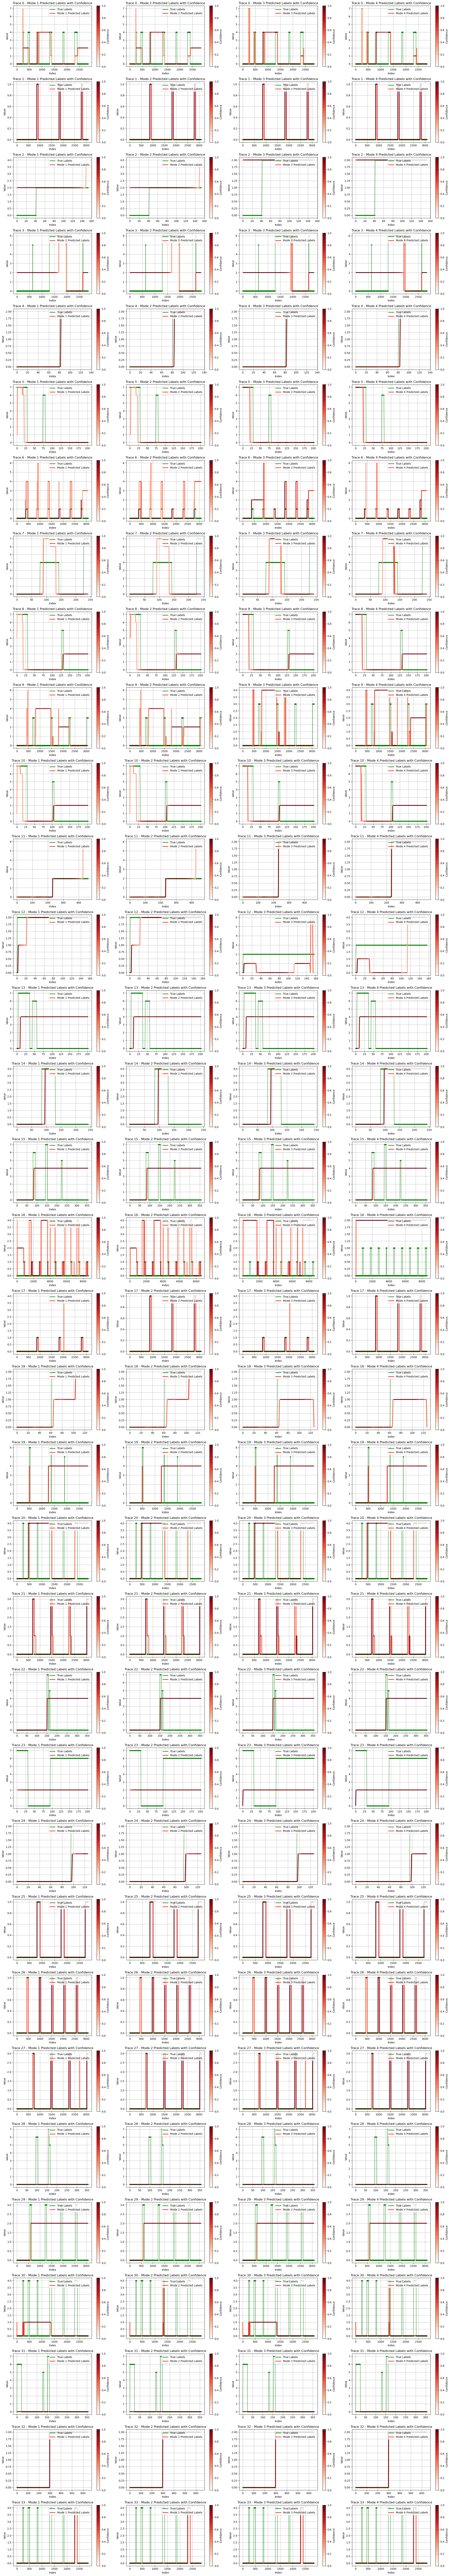

In [4]:
importlib.reload(utils)
test_results = joblib.load(f"../results/test/disturbed_inference.joblib")
utils.plot_predictions_four_modes(
    true_labels, 
    test_results[1]["labels"], test_results[2]["labels"], test_results[3]["labels"], test_results[4]["labels"], 
    test_results[1]["confidences"], test_results[2]["confidences"], test_results[3]["confidences"], test_results[4]["confidences"])

In [5]:
test_results = joblib.load(f"../results/test/disturbed_inference.joblib")
window_size = 40

y_disturbed_traces = []
y_disturbed_traces.extend(fold1_y_disturbed_traces)
y_disturbed_traces.extend(fold2_y_disturbed_traces)
y_disturbed_traces.extend(fold3_y_disturbed_traces)

anomaly_ranges = {}
for trace_index in range(len(y_disturbed_traces)):
    temp_anomaly_ranges = utils.create_anomaly_ranges(y_disturbed_traces[trace_index])  
    if trace_index not in anomaly_ranges:
        anomaly_ranges[trace_index] = {}
    for anomaly_type, ranges in temp_anomaly_ranges.items():
        if anomaly_type in anomaly_ranges[trace_index]:
            anomaly_ranges[trace_index][anomaly_type].extend(ranges)  # Append ranges if key already exists
        else:
            anomaly_ranges[trace_index][anomaly_type] = ranges  # Add new key if it doesn't exist

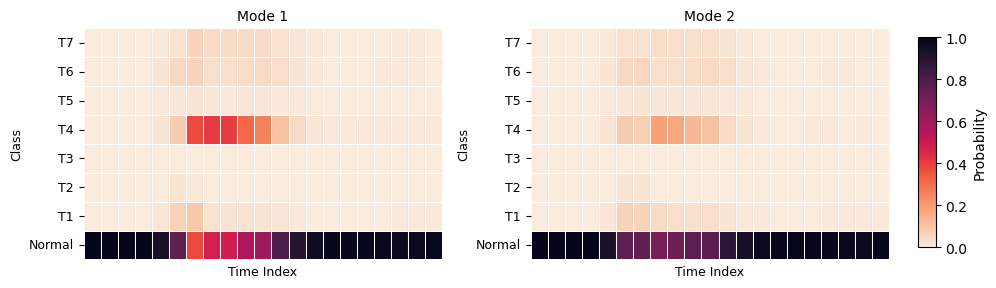

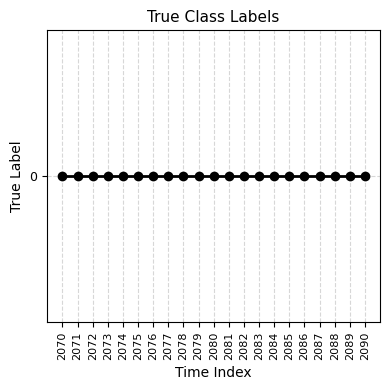

In [22]:
importlib.reload(utils)

utils.visualize_prediction_probs([0, 1],
    test_results[1]['probs'],
    test_results[2]['probs'],
    test_results[3]['probs'],
    test_results[4]['probs'],
    anomaly_ranges, window_size, 17, 2030, 2050) 


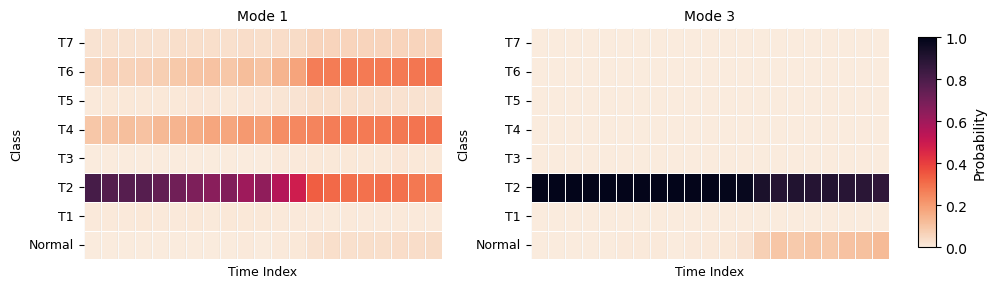

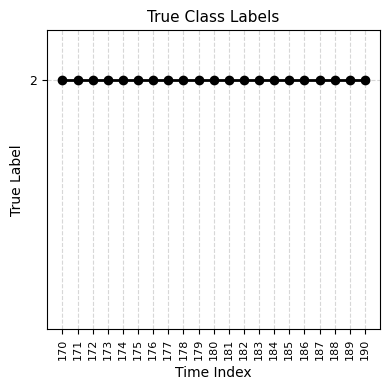

In [23]:
importlib.reload(utils)

utils.visualize_prediction_probs([0, 2],
    test_results[1]['probs'],
    test_results[2]['probs'],
    test_results[3]['probs'],
    test_results[4]['probs'],
    anomaly_ranges, window_size, 2, 130, 150) 

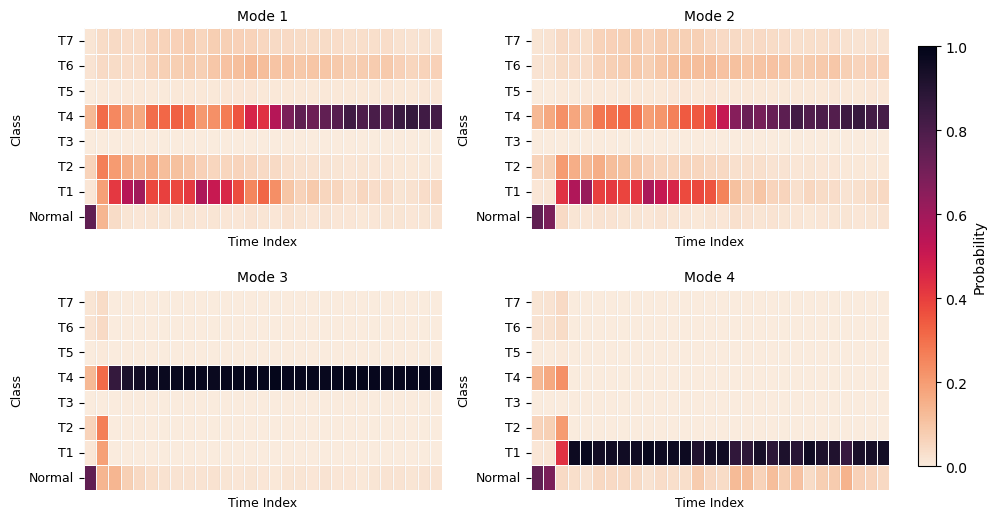

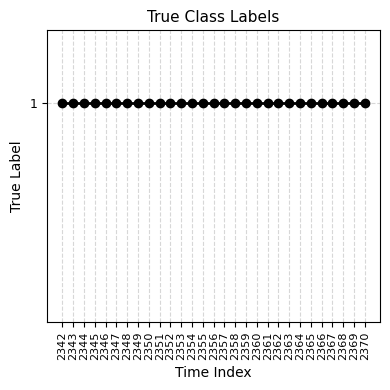

In [25]:
importlib.reload(utils)

utils.visualize_prediction_probs([0, 1, 2, 3],
    test_results[1]['probs'],
    test_results[2]['probs'],
    test_results[3]['probs'],
    test_results[4]['probs'],
    anomaly_ranges, window_size, 6, 2302, 2330) 